In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_whole_dataset
from models.outcome_model import get_model
from simulation.predictor import MaxProbabilityOutcomePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import get_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [2]:
X, y = get_whole_dataset("home_win", filter_start="2010-06-12")
model = get_model(X=X, y=y, n_estimators=5000)
predictor = MaxProbabilityOutcomePredictor(model)

In [3]:
match_template = pd.read_csv('data/original/wc_2010_games_real.csv')
run_actual_tournament_simulation(match_template, predictor)
tournament_simulation = get_simulation_results()
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
delete_all()
tournament_simulation

,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob,true_outcome
0,1,0,2010-06-11,South Africa,Mexico,1,1,-1,0.205653,0.269351,0.524996,0
1,2,1,2010-06-11,Uruguay,France,0,0,-1,0.255182,0.323413,0.421405,0
2,3,2,2010-06-12,Argentina,Nigeria,1,0,1,0.617318,0.203946,0.178736,1
3,4,3,2010-06-12,England,United States,1,1,1,0.598142,0.213310,0.188548,0
4,5,4,2010-06-12,Korea Republic,Greece,2,0,-1,0.300608,0.291399,0.407993,1
5,6,5,2010-06-13,Algeria,Slovenia,0,1,-1,0.301151,0.264455,0.434394,-1
6,7,6,2010-06-13,Germany,Australia,4,0,1,0.558948,0.247203,0.193849,1
7,8,7,2010-06-13,Serbia,Ghana,0,1,1,0.494191,0.272664,0.233144,-1
8,9,8,2010-06-14,Italy,Paraguay,1,1,1,0.639430,0.206340,0.154231,0
9,10,9,2010-06-14,Japan,Cameroon,1,0,-1,0.313640,0.311688,0.374672,1


In [4]:
match_bets = pd.read_csv('data/original/wc_2010_bets.csv')
match_bets[30:40]

,id,date,home_team,away_team,1,X,2
30,30,2010-06-21,Portugal,Korea DPR,1.34,4.49,10.13
31,31,2010-06-21,Spain,Honduras,1.11,8.74,24.07
32,32,2010-06-22,Greece,Argentina,7.37,4.17,1.48
33,33,2010-06-22,Mexico,Uruguay,3.74,1.95,3.66
34,34,2010-06-22,Nigeria,Korea Republic,2.94,3.29,2.46
35,35,2010-06-22,South Africa,France,2.10,3.45,3.52
36,36,2010-06-23,Australia,Serbia,4.39,3.58,1.84
37,37,2010-06-23,Ghana,Germany,7.75,4.32,1.45
38,38,2010-06-23,Slovenia,England,8.06,4.26,1.44
39,39,2010-06-23,United States,Algeria,1.87,3.59,4.23


Profit: 1.5625%
Balance:  65.0


65.000000000000014

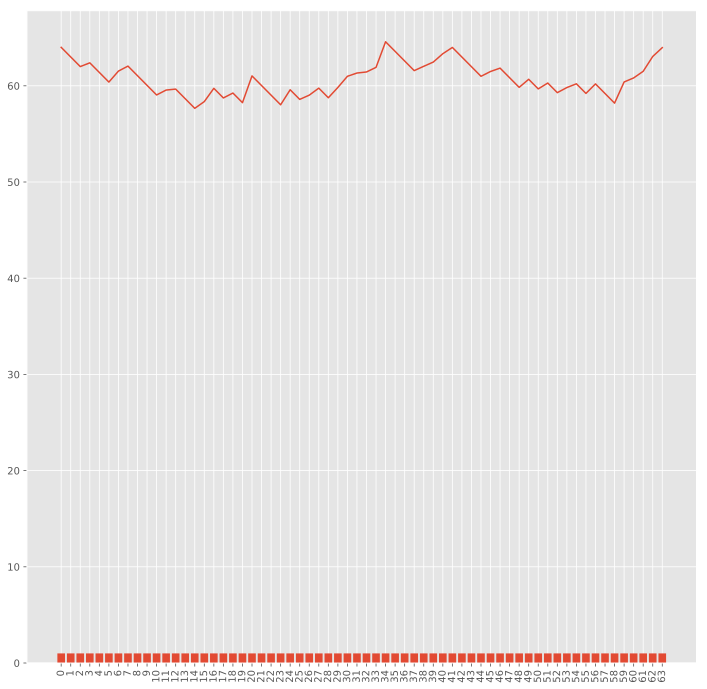

In [5]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds, plot=True)

Profit: 7.8356%
Balance:  69.014768709


69.014768709006205

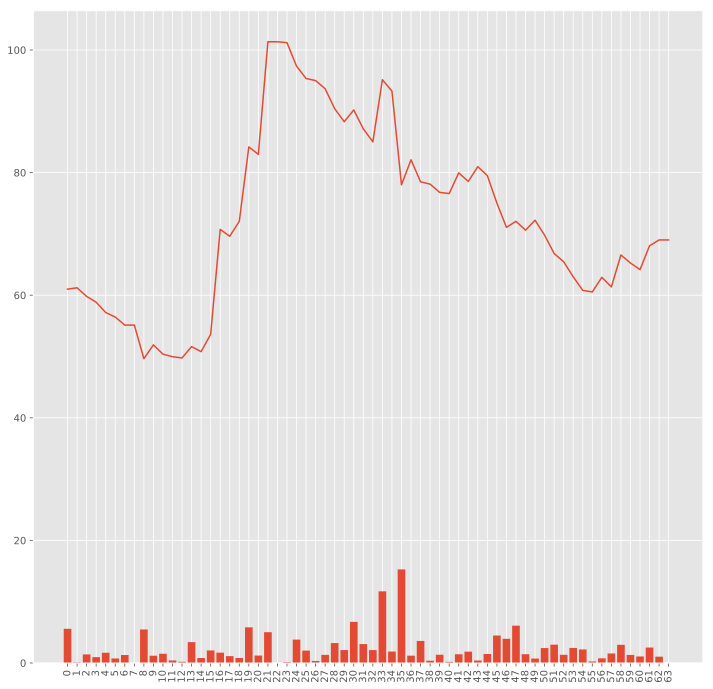

In [6]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_true, odds, probabilities, plot=True, coef=0.3)